In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('drive/MyDrive/DeepLearning/Proj2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
from python_scripts import *
import numpy as np

In [70]:
X_train, train_labels = make_dataset()
X_test, test_labels = make_dataset()

In [71]:
activation = ReLU
criterion = CrossEntropyLoss()

In [ ]:
modes = [None, 'x', 'he']
lrs = [1, 0.1, 0.01, 0.001]

train_losses = np.zeros((len(modes), len(lrs), 200))
test_losses  = np.zeros((len(modes), len(lrs), 200))
train_error  = np.zeros((len(modes), len(lrs), 200))
test_error   = np.zeros((len(modes), len(lrs), 200))

for i,mod in enumerate(modes):
  for j,lr in enumerate(lrs):  
    model = create_model(activation, 0.0, mod)
    optimizer = SGD(model.param(), lr)

    trlo, telo, trer, teer = training(model, criterion, optimizer, X_train, X_test, train_labels, test_labels, batch_size=100)
    
    train_losses[i,j,:] = trlo
    test_losses[i,j,:] = telo
    train_error[i,j,:] = trer
    test_error[i,j,:] = teer

Epoch [1/200]: Train Loss = 0.7130, Test Loss = 0.7076
Train Error = 49.80%, Test Error = 49.10%
Epoch [21/200]: Train Loss = 0.6906, Test Loss = 0.6889
Train Error = 49.70%, Test Error = 48.50%
Epoch [41/200]: Train Loss = 0.6885, Test Loss = 0.6873
Train Error = 28.90%, Test Error = 23.90%
Epoch [61/200]: Train Loss = 0.6870, Test Loss = 0.6859
Train Error = 30.50%, Test Error = 28.00%
Epoch [81/200]: Train Loss = 0.6853, Test Loss = 0.6842
Train Error = 30.50%, Test Error = 27.80%
Epoch [101/200]: Train Loss = 0.6833, Test Loss = 0.6822
Train Error = 29.50%, Test Error = 26.80%
Epoch [121/200]: Train Loss = 0.6808, Test Loss = 0.6796
Train Error = 28.00%, Test Error = 27.60%
Epoch [141/200]: Train Loss = 0.6776, Test Loss = 0.6764
Train Error = 27.10%, Test Error = 27.50%
Epoch [161/200]: Train Loss = 0.6734, Test Loss = 0.6721
Train Error = 27.40%, Test Error = 26.80%
Epoch [181/200]: Train Loss = 0.6677, Test Loss = 0.6662
Train Error = 26.50%, Test Error = 26.50%
Epoch [1/200]: T

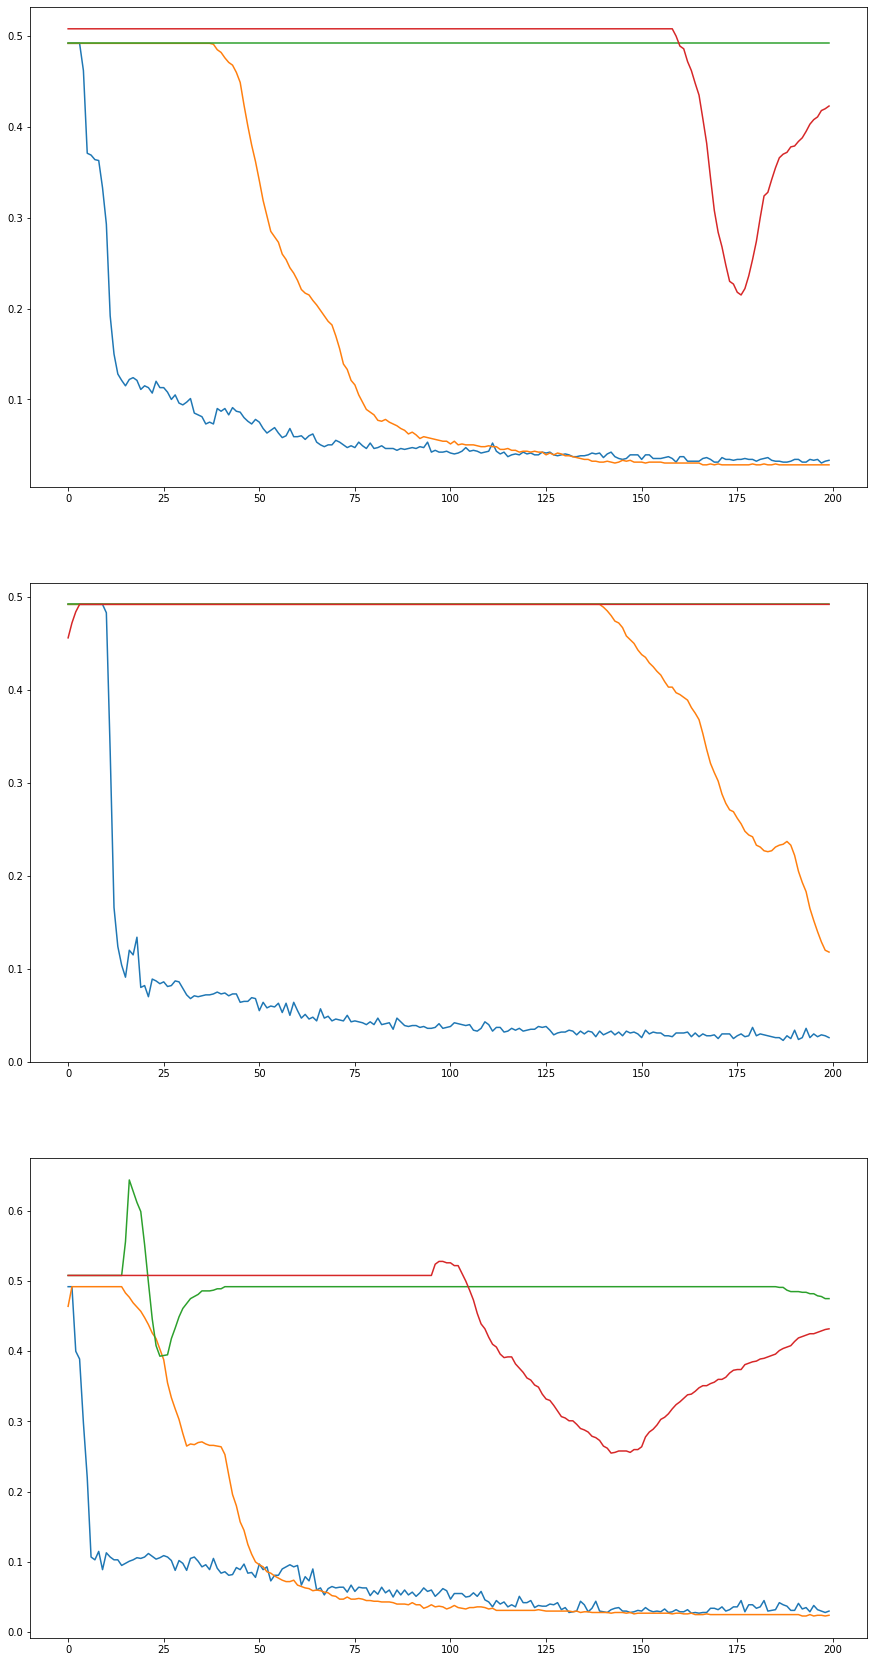

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=len(modes), ncols=1, figsize=(15,30))

ax = ax.ravel()
for i in range(len(modes)):
  for j in range(len(lrs)):
    ax[i].plot(test_error[i,j])

plt.show()

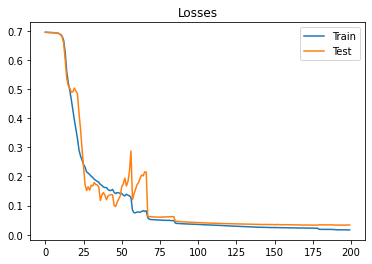

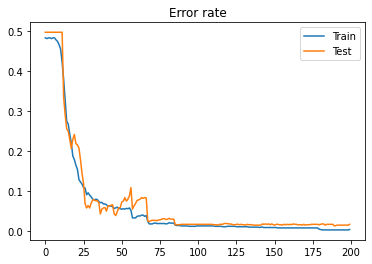

In [9]:
plt.figure()
plt.title('Losses')
plt.plot(trlo)
plt.plot(telo)
plt.legend(['Train', 'Test'])

plt.figure()
plt.title('Error rate')
plt.plot(trer)
plt.plot(teer)
plt.legend(['Train', 'Test'])

In [ ]:
train_losses = []
test_losses = []
train_errors = []
test_errors = []

num_epoch = 5
batch_size = 10

for epoch in range(num_epoch):
    
    train_error = 0
    test_error = 0
    train_loss = 0
    test_loss = 0
    
    train_preds = []
    test_preds = []
    
    model.train()

    for i in range(0, X_train.size(0), batch_size):
        
        x = X_train[i:i+batch_size, :]
        labels = train_labels[i:i+batch_size] 

        output = model.forward(x)
        print(output.shape)
        loss = criterion.forward(output, labels.long())
        train_loss += loss

        pred = (output.view(-1) > 0.5).float() # For MSE
        #pred = output.argmax(dim = 1) # for CrossEntropy
        train_preds += [p.item() for p in pred]
        
        train_error += (pred != labels).sum()
        
        model.zero_grad()
        model.backward(criterion.backward())
        optimizer.forward()
      
    model.eval()
            
    for i in range(0, X_test.size(0), batch_size):
        
        x = X_test[i:i+batch_size, :]
        labels = test_labels[i:i+batch_size]  
        
        output = model.forward(x)
        test_loss += criterion.forward(output, labels.long())

        pred = (output.view(-1) > 0.5).float() # For MSE
        #pred = output.argmax(dim = 1) # For CrossEntropy
        test_preds += [p.item() for p in pred]
        
        test_error += (pred != labels).sum()

    if scheduler is not None:
        '''Here we overfit to the test set..., If we want to do it correctly we should do
        a validation set also'''
        scheduler.forward(test_error / (len(X_test)/batch_size))
    
    model.zero_grad()

    train_losses.append(train_loss/(len(X_train)/batch_size))
    test_losses.append(test_loss/(len(X_train)/batch_size))
    train_errors.append(train_error/len(X_train))
    test_errors.append(test_error/len(X_test))
    
    if epoch%20 == 0:
      print("Epoch [{}/{}]: Train Loss = {:.4f}, Test Loss = {:.4f}".format(epoch+1, num_epoch, train_losses[-1], test_losses[-1]))
      print("Train Error = {:.2f}%, Test Error = {:.2f}%".format(train_error/len(X_train) * 100, test_error/len(X_test)*100))

torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])


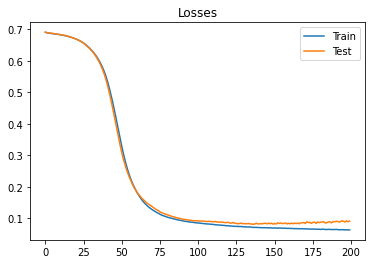

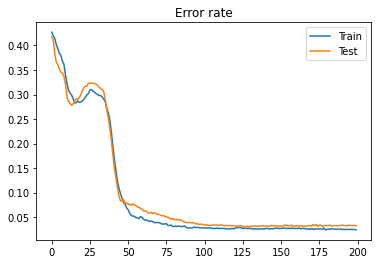

In [ ]:
plt.figure()
plt.title('Losses')
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['Train', 'Test'])

plt.figure()
plt.title('Error rate')
plt.plot(train_errors)
plt.plot(test_errors)
plt.legend(['Train', 'Test'])

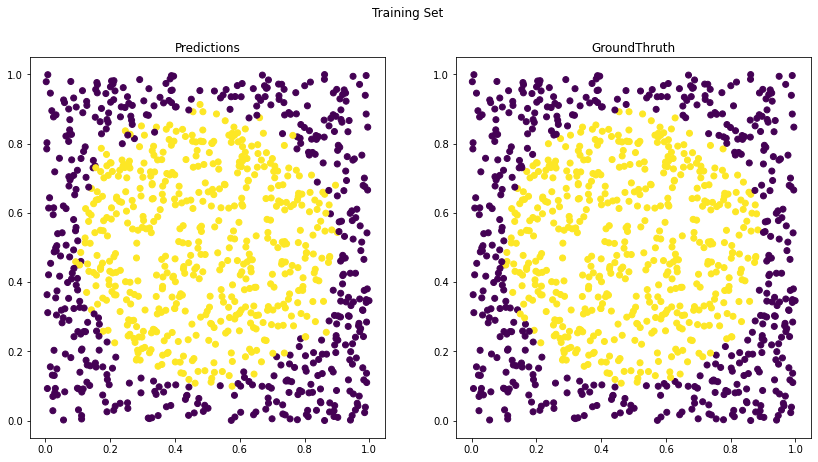

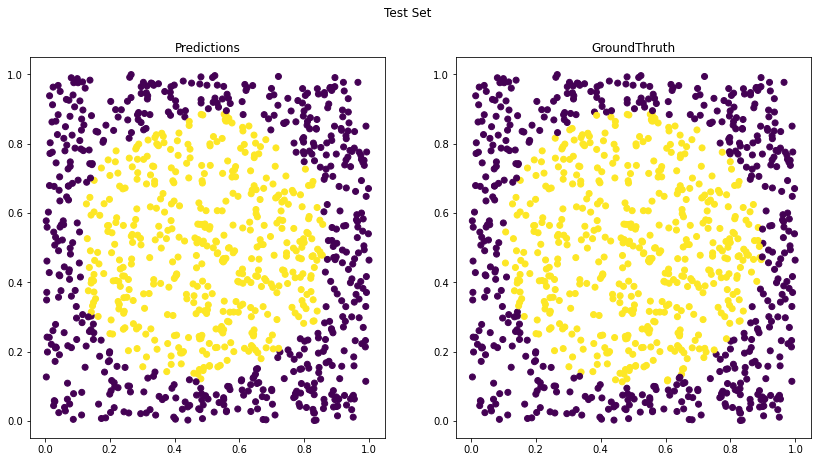

In [ ]:
plot_preds(X_train, train_preds, train_labels, X_test, test_preds, test_labels)

In [46]:
range(0, 5, 5)

range(0, 5, 5)

In [50]:
for i in range(0,5,5): 
  print(i)

0
